# RFC(HAR)

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [3]:
xtrain=pd.read_table('X_train.txt',delim_whitespace=True,header=None)

In [4]:
xtest=pd.read_table('X_test.txt',delim_whitespace=True,header=None)

In [5]:
ytrain=pd.read_table('y_train.txt',header=None)

In [6]:

ytest=pd.read_table('y_test.txt',header=None)

In [7]:
xtrain.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [8]:

classifier = RandomForestClassifier()

In [9]:
parameters = {'n_estimators': [10, 100, 1000], 'max_depth': [3, 6, 9], 'max_features' : ['auto', 'log2']}

In [10]:
model=GridSearchCV(classifier,parameters,n_jobs=-1,cv=4,scoring='accuracy',verbose=4)


In [11]:
import numpy as np
xtrain = np.asarray(xtrain)
ytrain = np.asarray(ytrain)

In [12]:
model.fit(xtrain,ytrain.ravel().T)

Fitting 4 folds for each of 18 candidates, totalling 72 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [10, 100, 1000]},
             scoring='accuracy', verbose=4)

In [13]:
from sklearn.metrics import accuracy_score
ypred=model.predict(xtest)
accuracy=accuracy_score(ytest,ypred)

In [14]:
print ('Best Parameters: '+ str(model.best_params_))
print ('Accuracy Score: '+ str(accuracy*100) + ' %')

Best Parameters: {'max_depth': 9, 'max_features': 'log2', 'n_estimators': 1000}
Accuracy Score: 92.63657957244655 %


In [15]:
ypred

array([5, 5, 5, ..., 2, 2, 1], dtype=int64)

In [16]:
ytest

,0
0,5
1,5
2,5
3,5
4,5
...,...
2942,2
2943,2
2944,2
2945,2


In [17]:
from sklearn.metrics import confusion_matrix, classification_report

In [18]:
print(confusion_matrix(ytest, ypred))

[[484   2  10   0   0   0]
 [ 29 436   6   0   0   0]
 [ 33  48 339   0   0   0]
 [  0   0   0 410  81   0]
 [  0   0   0   8 524   0]
 [  0   0   0   0   0 537]]


In [19]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           1       0.89      0.98      0.93       496
           2       0.90      0.93      0.91       471
           3       0.95      0.81      0.87       420
           4       0.98      0.84      0.90       491
           5       0.87      0.98      0.92       532
           6       1.00      1.00      1.00       537

    accuracy                           0.93      2947
   macro avg       0.93      0.92      0.92      2947
weighted avg       0.93      0.93      0.93      2947



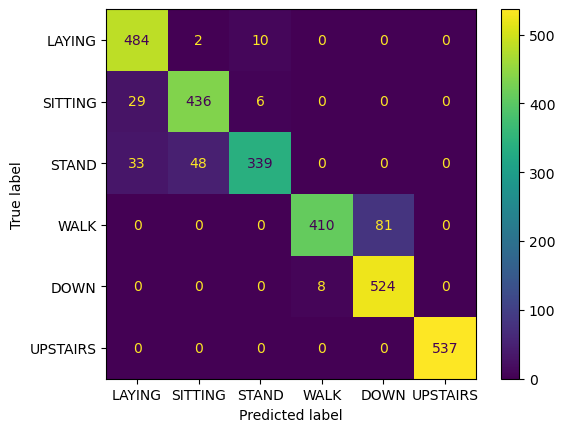

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from numpy.random import default_rng

conf_matrix =confusion_matrix(ytest, ypred)
vis=ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=['LAYING','SITTING', 'STAND', 'WALK', 'DOWN',
       'UPSTAIRS'])
vis.plot()

# kyphosis dataset

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
df = pd.read_csv('kyphosis.csv')

In [23]:
df.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [24]:
df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


# EDA 
# We'll just check out a simple pairplot for this small dataset

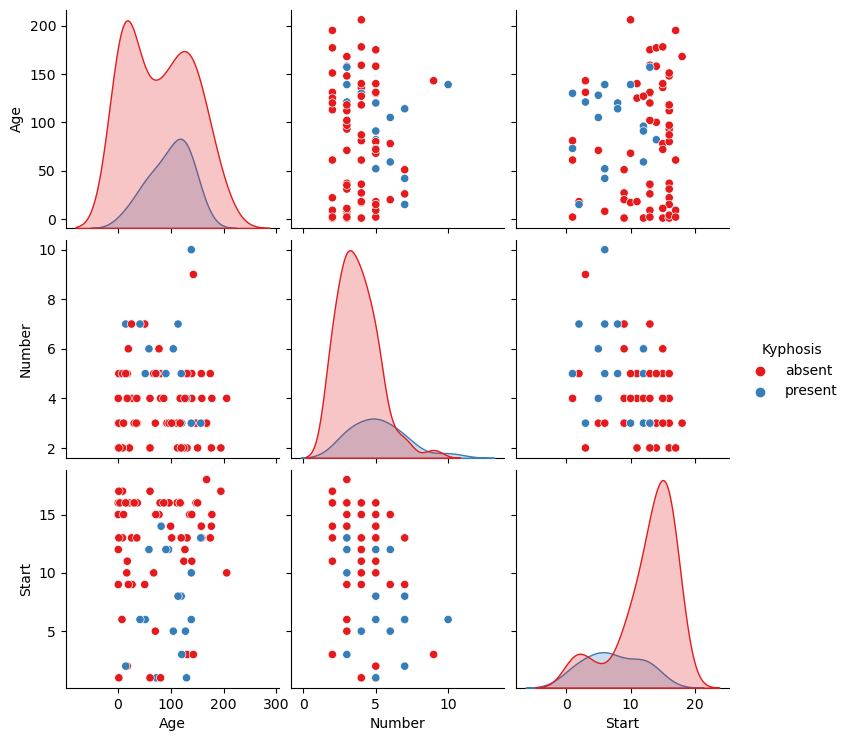

In [25]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [28]:
# Convert target labels to numeric values
y_numeric = y.map({'absent': 0, 'present': 1})

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.30)

In [30]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 100, criterion="entropy")
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [32]:
# Extract single tree
estimator = rfc.estimators_[5]

In [33]:
rfc_pred = rfc.predict(X_test)

In [34]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        21
           1       0.50      0.75      0.60         4

    accuracy                           0.84        25
   macro avg       0.72      0.80      0.75        25
weighted avg       0.88      0.84      0.85        25



In [35]:
from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test,rfc_pred )
print("Confusion Matrix is:\n",cm)

Confusion Matrix is:
 [[18  3]
 [ 1  3]]


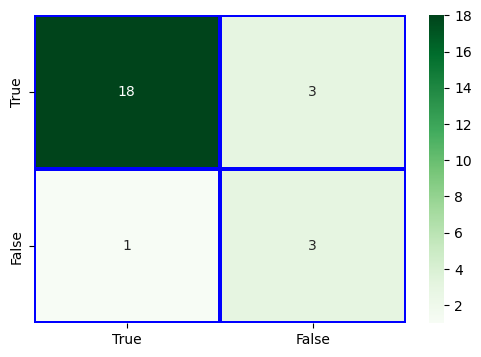

In [36]:
conf_matrix = pd.DataFrame(data = cm,
columns = ['True','False'],
index =['True','False'])
plt.figure(figsize = (6,4))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens", linecolor="blue",
linewidths=1.5)
plt.show()

In [37]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names = X.columns,
                class_names = ['absent', 'present'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [38]:
print('Training set score: {:.4f}'.format(rfc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(rfc.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.8400


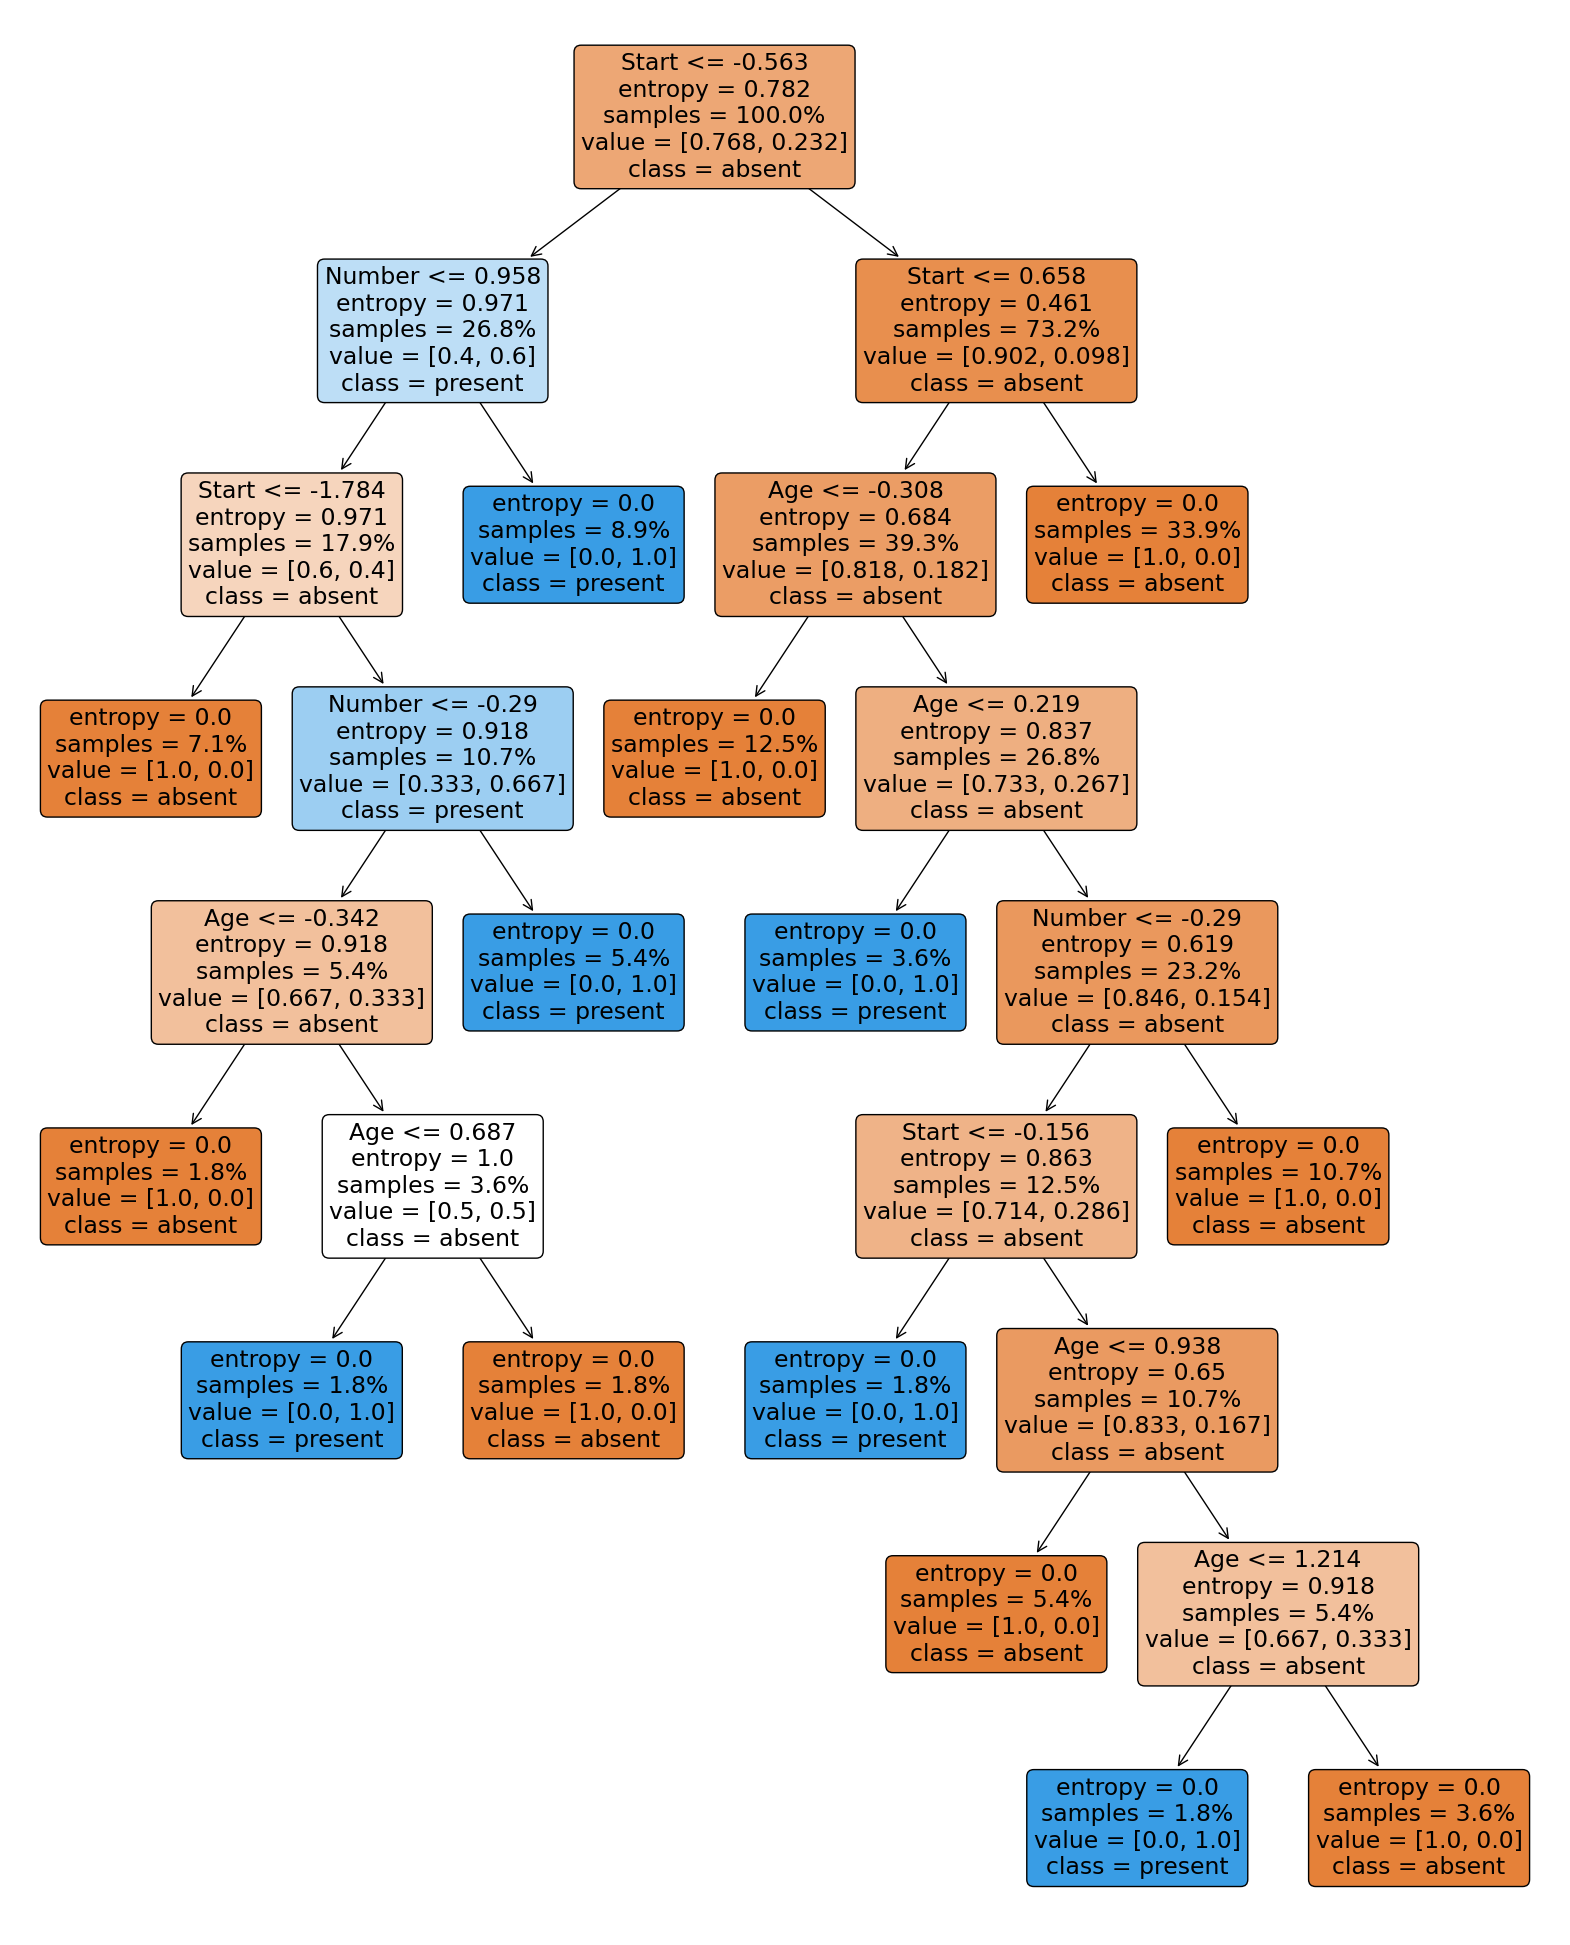

In [39]:
from IPython.display import Image
Image(filename ='Untitled.png')

# Convert to png
# go to this website: https://onlineconvertfree.com/convert-format/dot-to-png/